## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import timeit
import time
%alias_magic t timeit

plt.style.use('seaborn-talk')

from matplotlib import rcParams

# import warnings filter
from warnings import simplefilter 
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


In [155]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 18
plt.rc('figure', figsize=(8,6))
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

# Import phase I data

In [215]:
data = pd.read_csv('denc_Neutrino (2)')
mass = data['halo_mass']
data['in_halo'] = np.zeros(len(data), dtype=int)

j = 0
# n = min(data['halo_mass'])
# for m in np.logspace(2.8, 4, 5, endpoint=False):
#     inclass = (mass > m).astype('int32')
#     data['in_halo'] += inclass
#     num = np.sum(data['in_halo']==j)
#     print(f'class {j} ({n} < mass < {int(m)} ): {num}')
#     j+=1
#     n = int(m)
# num = np.sum(data['in_halo']==j)
# print(f'class {j} ({n} < mass ): {num}') 

data['in_halo'] = data['in_halo'] + (mass>1100).astype('int32') + (mass>1500).astype('int32') + (mass>2000).astype('int32') + (mass>3300).astype('int32')

for i in range(5):
    num = np.sum(data['in_halo']==j)
    print(f'class {j} : {num}')
    j+=1
    n = int(i)
data

class 0 : 21863
class 1 : 18723
class 2 : 16003
class 3 : 24472
class 4 : 18939


,id,haloID,halo_mass,vx,vy,vz,dc for 4.9,dc for 6.8,dc for 8.7,dc for 10.6,dc for 12.4,dc for 14.3,dc for 16.2,dc for 18.1,dc for 20.0,in_halo
0,10156552,755,2280.0,171.21194,220.56293,-274.228700,-0.084922,-0.052028,-0.042415,-0.028087,-0.024984,-0.018675,-0.016231,-0.011940,-0.010111,3
1,11068486,85,1539.0,-129.84116,92.60424,212.125500,-0.127820,-0.081099,-0.051217,-0.028345,-0.013751,-0.013991,-0.012344,-0.011500,-0.012220,2
2,9530036,654,1944.0,-290.99210,-885.49430,468.255040,-0.078978,-0.052806,-0.030027,-0.011704,0.001295,0.003803,0.005131,0.005231,0.003787,2
3,11455022,752,1394.0,-60.35258,422.43716,79.394300,-0.109989,-0.079155,-0.054663,-0.037685,-0.026670,-0.017901,-0.009227,-0.000868,0.001568,1
4,8591034,356,1649.0,403.66608,345.88077,9.231552,-0.084405,-0.019068,-0.009396,-0.001539,0.002288,0.005629,0.011288,0.013111,0.013433,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2160800,451,2634.0,654.82430,210.78130,255.344150,-0.094225,-0.076043,-0.060624,-0.040368,-0.020840,-0.016261,-0.011803,-0.005002,0.000918,3
99996,3257728,43,1112.0,-154.27774,488.65564,-779.558400,-0.127045,-0.076529,-0.056246,-0.038201,-0.027520,-0.016374,-0.008045,0.002627,0.006124,1
99997,6101605,484,1198.0,-113.51735,68.44336,275.964000,-0.122135,-0.091794,-0.063465,-0.032060,-0.017973,-0.016684,-0.017740,-0.017154,-0.012600,1
99998,4576456,44,1058.0,-130.21120,292.63483,-754.563000,-0.097585,-0.076140,-0.061788,-0.054584,-0.043055,-0.032415,-0.021591,-0.007463,0.004673,0


In [216]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,100000.0,8.716004e+06,3.549230e+06,2.131444e+06,5.953820e+06,9.043250e+06,1.176120e+07,1.464652e+07
haloID,100000.0,4.246277e+02,2.309625e+02,1.600000e+01,2.380000e+02,4.180000e+02,6.190000e+02,8.700000e+02
halo_mass,100000.0,2.369299e+03,1.856528e+03,2.410000e+02,1.194000e+03,1.791000e+03,2.945000e+03,1.010100e+04
vx,100000.0,3.520760e+01,3.648207e+02,-1.247932e+03,-2.262843e+02,3.285745e+01,2.841681e+02,1.314093e+03
vy,100000.0,-1.372866e+01,3.699198e+02,-1.462806e+03,-2.546561e+02,-4.815737e+00,2.385433e+02,1.256823e+03
vz,100000.0,9.782194e+01,3.735786e+02,-1.250520e+03,-1.458291e+02,1.018834e+02,3.500621e+02,1.355985e+03
dc for 4.9,100000.0,-1.073377e-01,2.030126e-02,-1.278203e-01,-1.242024e-01,-1.136070e-01,-9.577576e-02,1.715536e-02
dc for 6.8,100000.0,-6.207384e-02,2.096513e-02,-9.957240e-02,-7.789058e-02,-6.340362e-02,-4.872221e-02,3.246309e-02
dc for 8.7,100000.0,-3.866557e-02,1.992139e-02,-8.335055e-02,-5.247423e-02,-3.943445e-02,-2.537013e-02,4.434609e-02
dc for 10.6,100000.0,-2.595135e-02,1.810638e-02,-7.282418e-02,-3.851014e-02,-2.610032e-02,-1.358730e-02,4.048957e-02


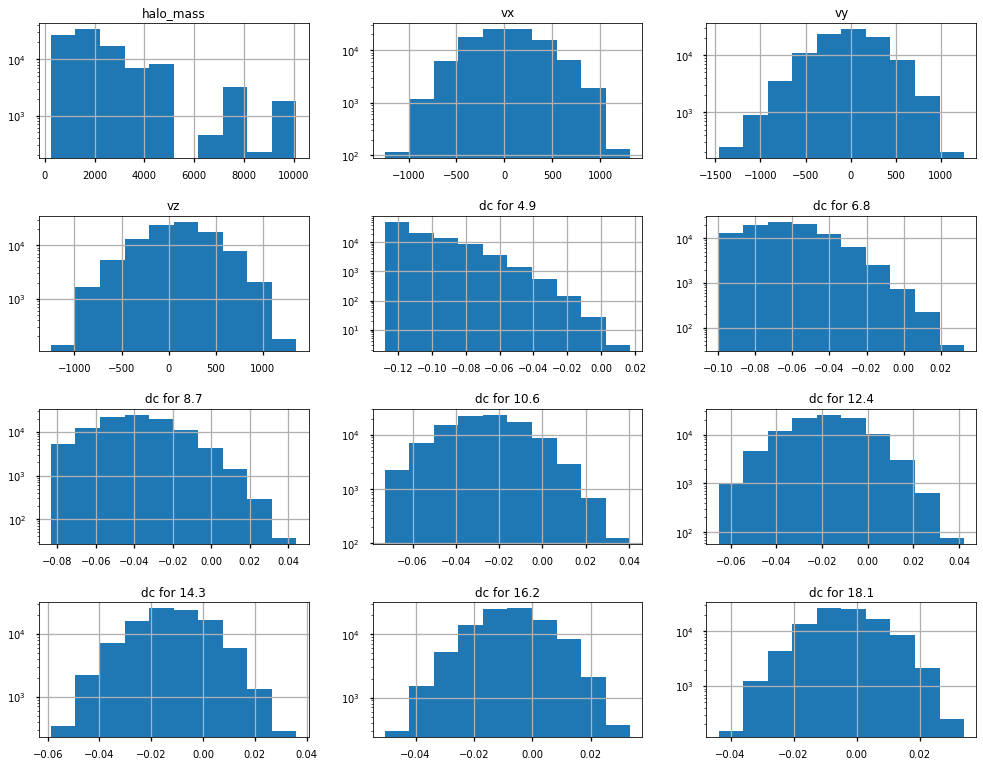

In [165]:
data.iloc[:,2:14].hist(figsize=(14,11), log=True)
plt.tight_layout()
plt.show()

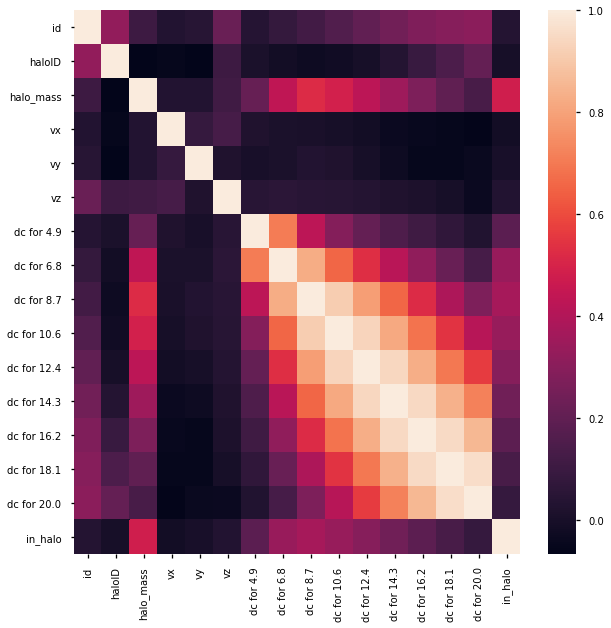

In [124]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.savefig('snscorr.png')

## Define Datasets

In [217]:
X = data.iloc[:,3:15].astype('float32').values
Y = data.in_halo.astype('int32').values

In [218]:
X = (X - np.mean(X))/np.std(X)

In [219]:
tst_size = 0.2
ns, nf = np.shape(X) 
X_train, X_test, Y_train, Y_test = train_test_split(*shuffle(X, Y, n_samples = ns, random_state=0) , random_state=0, test_size =tst_size )
print('X_train :',len(X_train),'   X_test :',len(X_test))

X_train : 80000    X_test : 20000


# Keras

In [221]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.losses import MeanSquaredError
from sklearn.metrics import classification_report


model = keras.Sequential()
model.add(layers.Dense(30,kernel_initializer=keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=1),activation='relu'))
model.add(layers.Dense(10,kernel_initializer=keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=1), input_shape=(12,),activation='tanh'))
model.add(keras.layers.Dense(5))


model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer = keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-06), metrics=['Accuracy'])

In [222]:
hist = model.fit(
    X_train,
    Y_train,
    batch_size= 100,
    epochs=40,
    verbose=2,
    validation_split=.2,
    shuffle=True,
)

Epoch 1/40
640/640 - 1s - loss: 1.5621 - Accuracy: 0.2880 - val_loss: 1.5608 - val_Accuracy: 0.2882
Epoch 2/40
640/640 - 1s - loss: 1.5452 - Accuracy: 0.3004 - val_loss: 1.5367 - val_Accuracy: 0.3096
Epoch 3/40
640/640 - 1s - loss: 1.5359 - Accuracy: 0.3061 - val_loss: 1.5337 - val_Accuracy: 0.3066
Epoch 4/40
640/640 - 1s - loss: 1.5321 - Accuracy: 0.3059 - val_loss: 1.5269 - val_Accuracy: 0.3120
Epoch 5/40
640/640 - 1s - loss: 1.5279 - Accuracy: 0.3095 - val_loss: 1.5255 - val_Accuracy: 0.3105
Epoch 6/40
640/640 - 1s - loss: 1.5258 - Accuracy: 0.3082 - val_loss: 1.5283 - val_Accuracy: 0.3141
Epoch 7/40
640/640 - 1s - loss: 1.5240 - Accuracy: 0.3119 - val_loss: 1.5267 - val_Accuracy: 0.3112
Epoch 8/40
640/640 - 1s - loss: 1.5233 - Accuracy: 0.3108 - val_loss: 1.5320 - val_Accuracy: 0.3044
Epoch 9/40
640/640 - 1s - loss: 1.5221 - Accuracy: 0.3146 - val_loss: 1.5229 - val_Accuracy: 0.3160
Epoch 10/40
640/640 - 1s - loss: 1.5210 - Accuracy: 0.3145 - val_loss: 1.5274 - val_Accuracy: 0.3137

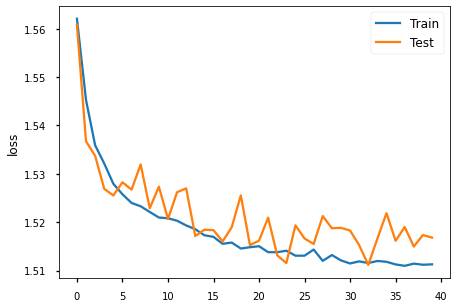

In [223]:
fig = plt.figure(figsize=(7,5))

ax1 = fig.add_subplot(1,1,1, ylabel= 'loss')
ax1.plot(hist.history['loss'])
ax1.plot(hist.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

## Tuning HP

In [224]:
# !pip install -q -U keras-tuner
import keras_tuner as kt

In [225]:
# https://www.tensorflow.org/tutorials/keras/keras_tuner
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(12, )))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=12, max_value=40, step=2)
  model.add(keras.layers.Dense(units=hp_units, 
                               activation='relu', 
                               kernel_regularizer=keras.regularizers.l2(.05)))
  model.add(keras.layers.Dense(units=hp_units, 
                               activation='tanh', 
                               kernel_regularizer=keras.regularizers.l2(.05)))
  model.add(keras.layers.Dense(5))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 2e-2])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [226]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     project_name='kt13')

In [227]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [228]:
tuner.search(X_train, Y_train, 
             epochs=50, 
             batch_size = 100, 
             validation_split=0.2, 
             callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 07s]
val_accuracy: 0.24456250667572021

Best val_accuracy So Far: 0.2800624966621399
Total elapsed time: 00h 02m 12s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 12 and the optimal learning rate for the optimizer
is 0.001.



## Model with Best HP

In [229]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, Y_train, 
                    epochs=30, 
                    batch_size = 100, 
                    validation_data=(X_test, Y_test))

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/30
800/800 [==============================] - 1s 1ms/step - loss: 1.8628 - accuracy: 0.2560 - val_loss: 1.5994 - val_accuracy: 0.2492
Epoch 2/30
800/800 [==============================] - 1s 1ms/step - loss: 1.5965 - accuracy: 0.2558 - val_loss: 1.5917 - val_accuracy: 0.2576
Epoch 3/30
800/800 [==============================] - 1s 1ms/step - loss: 1.5924 - accuracy: 0.2627 - val_loss: 1.5879 - val_accuracy: 0.2749
Epoch 4/30
800/800 [==============================] - 1s 1ms/step - loss: 1.5888 - accuracy: 0.2716 - val_loss: 1.5833 - val_accuracy: 0.2764
Epoch 5/30
800/800 [==============================] - 1s 1ms/step - loss: 1.5855 - accuracy: 0.2733 - val_loss: 1.5807 - val_accuracy: 0.2777
Epoch 6/30
800/800 [==============================] - 1s 1ms/step - loss: 1.5829 - accuracy: 0.2740 - val_loss: 1.5774 - val_accuracy: 0.2785
Epoch 7/30
800/800 [==============================] - 1s 1ms/step - loss: 1.5807 - accuracy: 0.2745 - val_loss: 1.5762 - val_accuracy: 0.2804
Epoch 

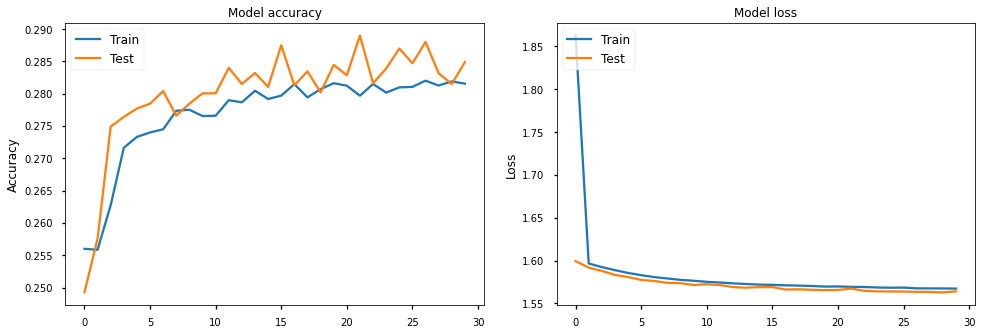

In [230]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

## Classification Report

In [231]:
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, model.predict(X_test).argmax(axis=1))
print(clf_report)

              precision    recall  f1-score   support

           0       0.22      0.03      0.06      4429
           1       0.25      0.46      0.32      3719
           2       0.00      0.00      0.00      3208
           3       0.32      0.51      0.39      4931
           4       0.29      0.37      0.32      3713

    accuracy                           0.28     20000
   macro avg       0.22      0.27      0.22     20000
weighted avg       0.23      0.28      0.23     20000



C:\Users\ff15m\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ff15m\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ff15m\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


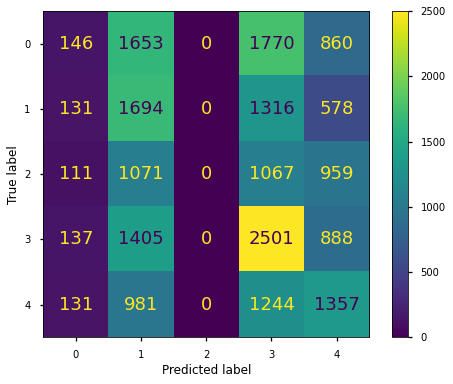

In [232]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(Y_test, model.predict(X_test).argmax(axis=1))
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm)
disp1.plot()
plt.show()